In [2]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from scipy.misc import imread, imresize
import glob
from os import listdir
from os.path import isfile, join

In [3]:
%matplotlib inline
sns.set_context("poster")

In [4]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# set location of calibration images
path = "../cnd-all/camera_cal"
images = sorted(["{}/{}".format(path, f) for f in listdir(path) if isfile(join(path, f))])


/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


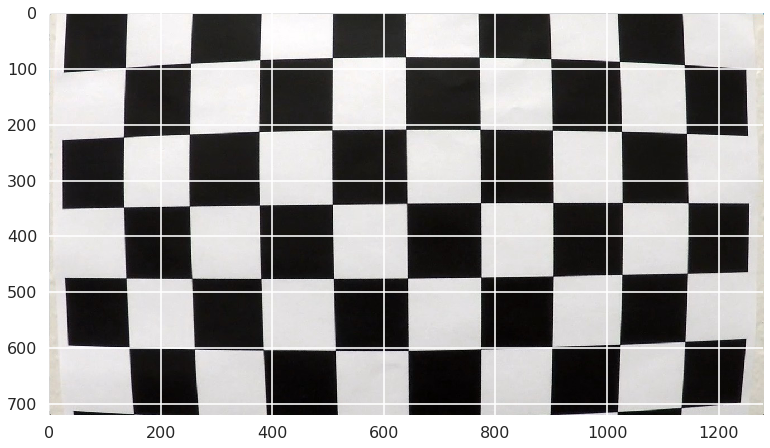

In [6]:
plt.imshow(imread(images[0]))

In [8]:
nx = 9 # the number of inside corners in x
ny = 6 # the number of inside corners in y

In [9]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.


#loop through each image and find the chess board corners, if
#found add these points and the standard points to the output
#this allows more points for a better fit and insures coverage
#versus using just 1 image
for i, fname in enumerate(images):
    print('processing', i, fname)
    img = imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    img = cv2.drawChessboardCorners(img, (nx, ny), corners, True)

    if ret:
        print('FOUND corners!')
        objpoints.append(objp)
        
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        


processing 0 ../cnd-all/camera_cal/calibration1.jpg
processing 1 ../cnd-all/camera_cal/calibration10.jpg
FOUND corners!
processing 2 ../cnd-all/camera_cal/calibration11.jpg
FOUND corners!
processing 3 ../cnd-all/camera_cal/calibration12.jpg
FOUND corners!
processing 4 ../cnd-all/camera_cal/calibration13.jpg
FOUND corners!
processing 5 ../cnd-all/camera_cal/calibration14.jpg
FOUND corners!
processing 6 ../cnd-all/camera_cal/calibration15.jpg
FOUND corners!
processing 7 ../cnd-all/camera_cal/calibration16.jpg
FOUND corners!
processing 8 ../cnd-all/camera_cal/calibration17.jpg
FOUND corners!
processing 9 ../cnd-all/camera_cal/calibration18.jpg
FOUND corners!
processing 10 ../cnd-all/camera_cal/calibration19.jpg
FOUND corners!
processing 11 ../cnd-all/camera_cal/calibration2.jpg
FOUND corners!
processing 12 ../cnd-all/camera_cal/calibration20.jpg
FOUND corners!
processing 13 ../cnd-all/camera_cal/calibration3.jpg
FOUND corners!
processing 14 ../cnd-all/camera_cal/calibration4.jpg
processin

In [10]:
#here we actually get the calibration matrix and distortion coefficients
#http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_calib3d/py_calibration/py_calibration.html
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[0:2],None,None)

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


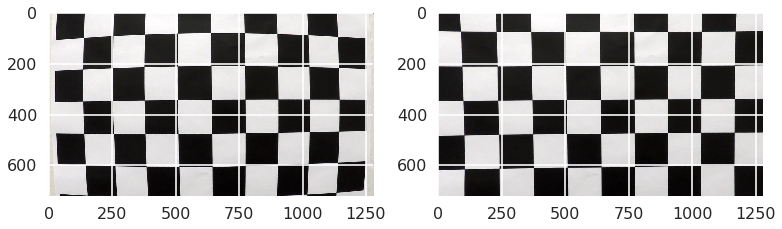

In [15]:
#lets look at the original and undistorted image to make sure this is being done correctly
img = imread(images[0])
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),0,(w,h))

plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
undistort = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(undistort)

In [13]:
calibration_data = {
    "mtx": mtx,
    "camera_mtx": newcameramtx,
    "dist": dist
}

In [14]:
with open("udacity_project_4_camera_calibration.pkl", 'wb') as f:
    pickle.dump(calibration_data, f)